<a href="https://colab.research.google.com/github/gauriagarwal18/HEALTH-INSURANCE-CROSS-SELL-PREDICTION/blob/master/HEALTH_INSURANCE_CROSS_SELL_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

Our client is an Insurance company that has provided Health Insurance to its customers now they need your help in building a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company.

An insurance policy is an arrangement by which a company undertakes to provide a guarantee of compensation for specified loss, damage, illness, or death in return for the payment of a specified premium. A premium is a sum of money that the customer needs to pay regularly to an insurance company for this guarantee.

For example, you may pay a premium of Rs. 5000 each year for a health insurance cover of Rs. 200,000/- so that if, God forbid, you fall ill and need to be hospitalised in that year, the insurance provider company will bear the cost of hospitalisation etc. for upto Rs. 200,000. Now if you are wondering how can company bear such high hospitalisation cost when it charges a premium of only Rs. 5000/-, that is where the concept of probabilities comes in picture. For example, like you, there may be 100 customers who would be paying a premium of Rs. 5000 every year, but only a few of them (say 2-3) would get hospitalised that year and not everyone. This way everyone shares the risk of everyone else.

Just like medical insurance, there is vehicle insurance where every year customer needs to pay a premium of certain amount to insurance provider company so that in case of unfortunate accident by the vehicle, the insurance provider company will provide a compensation (called ‘sum assured’) to the customer.

Building a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue.

Now, in order to predict, whether the customer would be interested in Vehicle insurance, you have information about demographics (gender, age, region code type), Vehicles (Vehicle Age, Damage), Policy (Premium, sourcing channel) etc.

# **Attribute Information**

1. id :	Unique ID for the customer

2. Gender	: Gender of the customer

3. Age :	Age of the customer

4. Driving_License	0 : Customer does not have DL, 1 : Customer already has DL

5. Region_Code :	Unique code for the region of the customer

6. Previously_Insured	: 1 : Customer already has Vehicle Insurance, 0 : Customer doesn't have Vehicle Insurance

7. Vehicle_Age :	Age of the Vehicle

8. Vehicle_Damage	 :1 : Customer got his/her vehicle damaged in the past. 0 : Customer didn't get his/her vehicle damaged in the past.

9. Annual_Premium	: The amount customer needs to pay as premium in the year

10. PolicySalesChannel :	Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.

11. Vintage :	Number of Days, Customer has been associated with the company

12. Response :	1 : Customer is interested, 0 : Customer is not interested

In [ ]:
#TRAIN-HEALTH INSURANCE CROSS SELL PREDICTION

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#Download datasets 
from google.colab import drive
drive.mount('/content/drive')
import os
path="/content/drive/My Drive/AlmaBetter_Capstone_projects/capstone_project3/TRAIN-HEALTH INSURANCE CROSS SELL PREDICTION.csv"
insurance_original=pd.read_csv(path,parse_dates=[2,3])
insurance= insurance_original.copy()

Mounted at /content/drive


In [ ]:
insurance.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [ ]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  object 
 3   Driving_License       381109 non-null  object 
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 34.9+ MB


In [ ]:
insurance["Age"].dtype

dtype('O')

In [ ]:
insurance.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [ ]:
categorical_col=['Gender','Driving_License', 'Region_Code','Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage','Policy_Sales_Channel', 'Vintage', 'Response']

In [ ]:
for c in categorical_col:
  print(f"for column {c}:\n",insurance[c].value_counts(),"\n")

for column Gender:
 Male      206089
Female    175020
Name: Gender, dtype: int64 

for column Driving_License:
 1    380297
0       812
Name: Driving_License, dtype: int64 

for column Region_Code:
 28.0    106415
8.0      33877
46.0     19749
41.0     18263
15.0     13308
30.0     12191
29.0     11065
50.0     10243
3.0       9251
11.0      9232
36.0      8797
33.0      7654
47.0      7436
35.0      6942
6.0       6280
45.0      5605
37.0      5501
18.0      5153
48.0      4681
14.0      4678
39.0      4644
10.0      4374
21.0      4266
2.0       4038
13.0      4036
7.0       3279
12.0      3198
9.0       3101
27.0      2823
32.0      2787
43.0      2639
17.0      2617
26.0      2587
25.0      2503
24.0      2415
38.0      2026
0.0       2021
16.0      2007
31.0      1960
23.0      1960
20.0      1935
49.0      1832
4.0       1801
34.0      1664
19.0      1535
22.0      1309
40.0      1295
5.0       1279
1.0       1008
44.0       808
42.0       591
52.0       267
51.0       183
Name: 

In [ ]:
pd.crosstab(insurance["Driving_License"],insurance["Response"])

Response,0,1
Driving_License,,
0,771,41
1,333628,46669


In [ ]:
#Previously_Insured
pd.crosstab(insurance["Previously_Insured"],insurance["Response"])

Response,0,1
Previously_Insured,,
0,159929,46552
1,174470,158


In [ ]:
def remove_outliers2(df,continuous_col=[]):

  if len(continuous_col)==0:

   continuous_col=df.describe().columns
  df[continuous_col].boxplot(rot=90)
  plt.title("before removing outliers",)
  plt.show()
  
  for c in continuous_col:
    df.index=np.arange(0,df.shape[0])
    Q1=np.quantile(df[c],0.25)
    Q3=np.quantile(df[c],0.75)
    IQR= Q3 - Q1
    upper=np.where(df[c]>=(Q3+1.5*IQR))[0]
    #print(upper[0])
    lower=np.where(df[c]<=(Q1-1.5*IQR))[0]   #it will be a tuple and we require a numpy array which is at it's first index.
    #print(lower)
    outliers_idx=np.unique(np.append(upper,lower)) 
    df.drop(outliers_idx, inplace = True) 
    
    #df.loc[upper][c]=Q3
    #df.loc[lower][c]=Q1
     
  df[continuous_col].boxplot(rot=90)
  plt.title("after removing outliers",)
  plt.show()
  return df

In [ ]:
insurance.shape

(381109, 12)

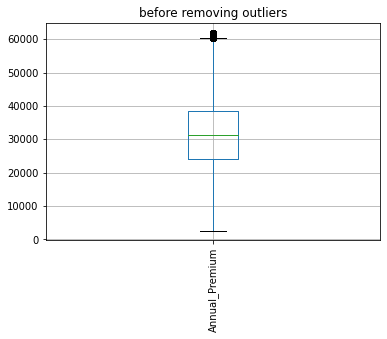

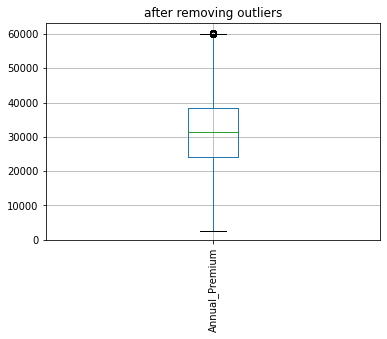

In [ ]:
insurance = remove_outliers2(insurance,["Annual_Premium"])

In [ ]:
insurance.shape

(369277, 12)